##**오디오 전처리**

## audio signal 시각화

In [ ]:
!pip install pydub

In [ ]:
#
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment

from scipy import signal
from scipy.io import wavfile

In [ ]:
pos_non_path = '/content/양성 무증상.mp3'
pos_y_path = '/content/양성 증상있음.mp3'
neg_path = '/content/음성 건강.mp3'


In [ ]:
song = AudioSegment.from_mp3(pos_non_path)
print(song.frame_rate)
print(song.duration_seconds)

44100
4.2982086167800455


In [ ]:
pos_non, sr1 = librosa.core.load(pos_non_path ,sr=44100)
pos_y, sr2 = librosa.core.load(pos_y_path, sr=44100)
neg, sr3 = librosa.core.load(neg_path, sr=44100)

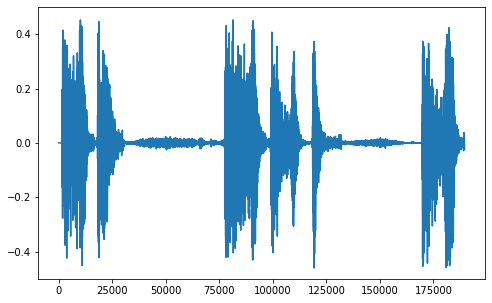

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(pos_non)
plt.ylim([-0.5,0.5])
plt.show()


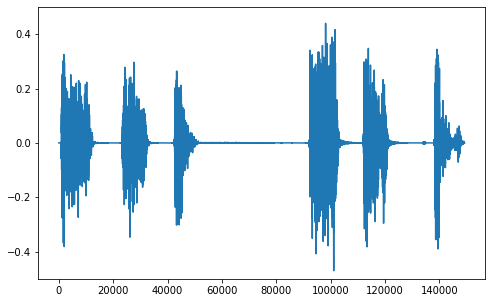

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(pos_y)
plt.ylim([-0.5,0.5])
plt.show()


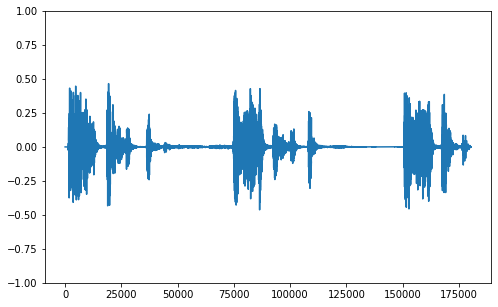

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(neg)
plt.ylim([-1,1])
plt.show()


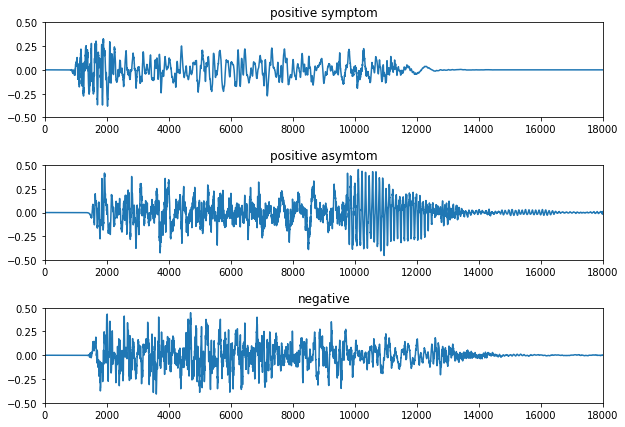

In [ ]:
plt.figure(figsize=[10,7])

plt.subplot(311)
plt.plot(pos_y)
plt.xlim(0,18000)
plt.ylim([-0.5,0.5])
plt.title('positive symptom')


plt.subplot(312)
plt.plot(pos_non)
plt.xlim(0,18000)
plt.ylim([-0.5,0.5])
plt.title('positive asymtom')


plt.subplot(313)
plt.plot(neg)
plt.xlim(0,18000)
plt.ylim([-0.5,0.5])
plt.title('negative')


plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.show()

## Spectrum

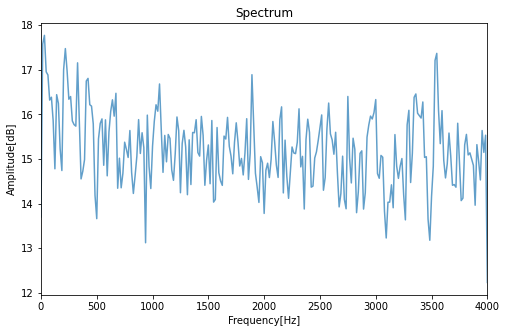

In [ ]:
sample_rate = sr1
n_fft = 512


data = np.fromfile(pos_non_path, dtype=np.int16)
data = data.astype(np.float) / 32767
data = librosa.stft(data[sample_rate // 4:sample_rate // 4 * 2], n_fft=n_fft)
data = np.mean(librosa.amplitude_to_db(np.abs(data)), axis=1)

plt.figure(figsize=[8,5])
plt.title('Spectrum')

plt.xlabel("Frequency[Hz]")
plt.xticks(range(0, n_fft//2+1, 32), np.arange(0, 4001, 500))
plt.xlim(0, n_fft//2)

plt.ylabel("Amplitude[dB]")

plt.plot(data,  alpha=0.7)



fig = plt.gcf()

plt.show()

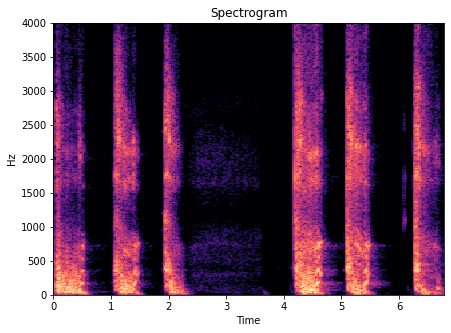

In [ ]:
D = np.abs(librosa.stft(pos_y))
plt.figure(figsize=[7,5])
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Spectrogram')
plt.ylim(0,4000)
plt.show()

In [ ]:
frame_length = 0.025
frame_stride = 0.010

def Mel_S(file):
    # mel-spectrogram
    y, sr = librosa.load(file, sr=16000)    

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))
    #D = np.abs(librosa.stft(y))**2 
    #S = librosa.feature.melspectrogram(S=D)
    S = librosa.feature.melspectrogram(y=y,n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))

    plt.figure(figsize=[10,6])
    
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
   
    plt.colorbar(format='%+2.0f dB')
    #plt.title('negative')
    plt.tight_layout()
    plt.savefig('Mel-Spectrogram example.png')
    plt.show()

Length: 4.29825, Mel_S shape:(40, 430)


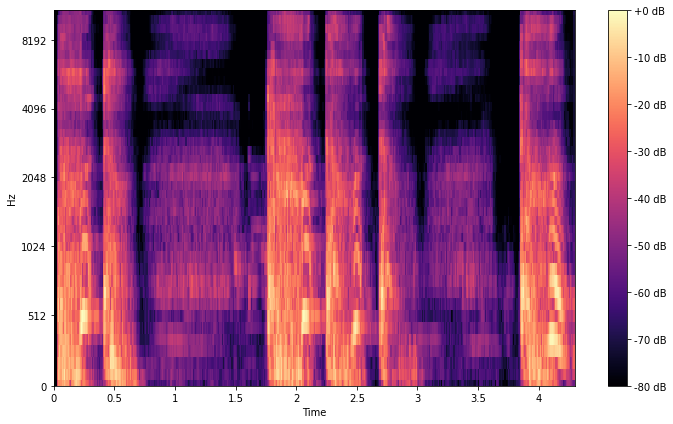

In [ ]:
Mel_S(pos_non_path)


Length: 4.5594375, Mel_S shape:(40, 456)


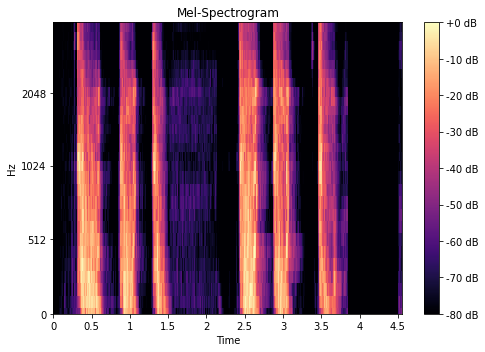

In [ ]:
Mel_S(pos_y_path)

Length: 5.16025, Mel_S shape:(40, 517)


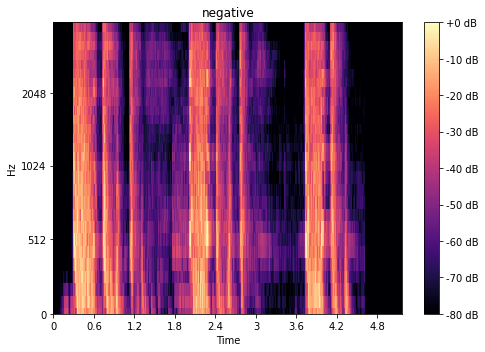

In [ ]:
Mel_S(neg_path)